03717357 Gregory Ollivierre COMP6930 A3

In [1]:
%matplotlib inline
import json
import numpy as np
import sklearn.cluster as cluster
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import os
import hdbscan
from collections import defaultdict
import pandas as pd
from wordcloud import WordCloud

In [2]:
# function to load the textual part of the tweet.
def parse_data_file(path):
    data = []
    with open(path, 'r') as fp:
        for line in fp:
            point = json.loads(line)
            text = point['text']
            data.append(text)
    return data
df = pd.DataFrame(parse_data_file('tweets.json'),columns=["Tweets"])
# function to clean raw tweets
def cleaning_func(line):
    line = "".join(c for c in line if c not in ":-._").replace('RT ','') # remove punctuation marks and special chars.
    list1 = line.split()
    list2 = []
    for word in list1:
        if word.startswith('@') or word.startswith('http'): # remove words that focus on the tweeter or website
            continue
        else:
            list2.append(word)
    return " ".join(list2)

df["Clean Tweets"] = df['Tweets'].apply(cleaning_func)
df.head()

,Tweets,Clean Tweets
0,RT @ItsJennaMarbles: Reports of Marathon Runne...,Reports of Marathon Runners that crossed finis...
1,RT @NBCSN: Reports of Marathon Runners that cr...,Reports of Marathon Runners that crossed finis...
2,RT @NBCSN: Reports of Marathon Runners that cr...,Reports of Marathon Runners that crossed finis...
3,RT @PeterBurnsRadio: RT @NBCSN: Reports of Mar...,Reports of Marathon Runners that crossed finis...
4,RT @NBCSN: Reports of Marathon Runners that cr...,Reports of Marathon Runners that crossed finis...


(251, 242)


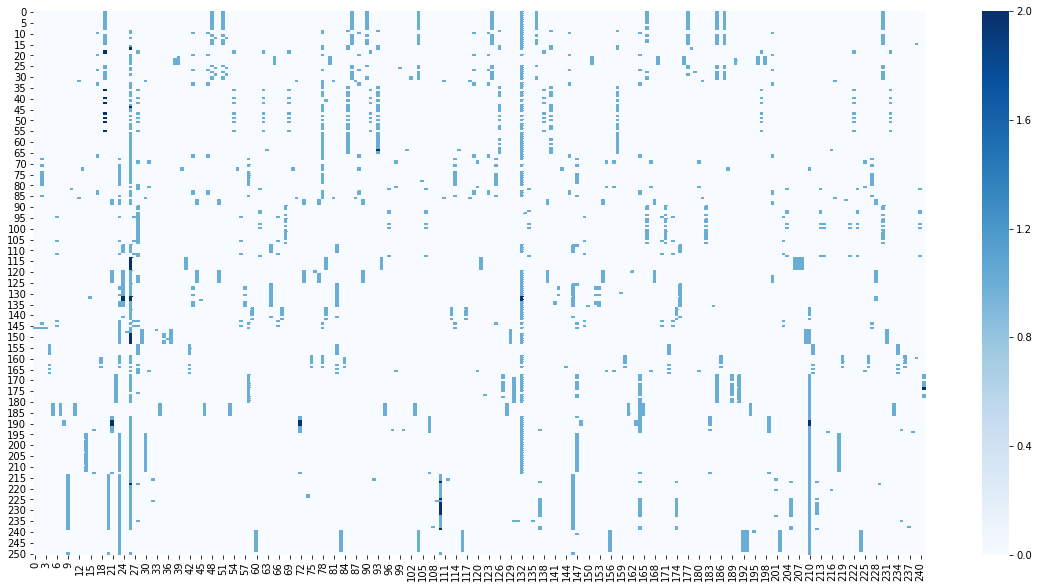

In [3]:
# lets use countevectorizer to build our bag of words
cv =CountVectorizer(stop_words='english')
X = cv.fit_transform(df['Clean Tweets']).todense()
print(X.shape)
# lets have a look at the matrix in heatmap form to guage the sparsity 
plt.figure(figsize=(20,10))
sns.heatmap(X,cmap='Blues')

In [7]:
# lets look at the vocabulary to get a sense of the words
cv.vocabulary_

{'04': 0,
 '13': 1,
 '140': 2,
 '15': 3,
 '1800callfbi': 4,
 '316es9': 5,
 '45': 6,
 '99': 7,
 'abc': 8,
 'aerial': 9,
 'amen': 10,
 'approach': 11,
 'area': 12,
 'arrest': 13,
 'arrested': 14,
 'attacks': 15,
 'black': 16,
 'blasts': 17,
 'blessed': 18,
 'blood': 19,
 'boat': 20,
 'bomb': 21,
 'bomber': 22,
 'bombing': 23,
 'bombs': 24,
 'bos': 25,
 'boston': 26,
 'bostonbombings': 27,
 'bostonmarathon': 28,
 'break': 29,
 'breaking': 30,
 'broken': 31,
 'business': 32,
 'bythere': 33,
 'car': 34,
 'cas': 35,
 'case': 36,
 'caught': 37,
 'cc': 38,
 'cellphone': 39,
 'charged': 40,
 'china': 41,
 'citizens': 42,
 'city': 43,
 'clues': 44,
 'cnn': 45,
 'color': 46,
 'confirm': 47,
 'continued': 48,
 'continuing': 49,
 'cooker': 50,
 'crossed': 51,
 'crossing': 52,
 'crv': 53,
 'currently': 54,
 'custody': 55,
 'cut': 56,
 'day': 57,
 'dead': 58,
 'deadly': 59,
 'death': 60,
 'defeat': 61,
 'demand': 62,
 'design': 63,
 'details': 64,
 'detonations': 65,
 'domestic': 66,
 'don': 67,
 'do

In [11]:
hdb = hdbscan.HDBSCAN(metric='euclidean')
clusters = hdb.fit_predict(X)
clusters = np.array(clusters) +1
tweet = [x+1 for x in range(len(parse_data_file('tweets.json')))]
assignments = list(zip(tweet, clusters))
groupings = defaultdict(list)
state_g = dict()
for s, c in assignments:
    groupings[c].append(s)
    state_g[s] = c
groupings_list = [(x,groupings[x],len(groupings[x])) for x in groupings]
groupings_list=sorted(groupings_list,key=lambda x:x[2],reverse=True) # sort by size of cluster
for group in groupings_list:
    print(group)

(3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 26, 27, 29, 30, 31, 32], 20)
(25, [10, 17, 36, 38, 39, 40, 44, 45, 46, 47, 49, 51, 54, 55, 60, 62, 64, 66], 18)
(17, [196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213], 18)
(22, [215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 235, 237, 238, 251], 14)
(14, [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181], 13)
(18, [69, 72, 75, 76, 77, 78, 79, 80, 81, 86, 145, 147], 12)
(9, [91, 92, 95, 97, 98, 100, 102, 103, 104, 105, 106, 108], 12)
(23, [218, 226, 227, 228, 229, 230, 231, 232, 233, 234, 239, 240], 12)
(8, [167, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250], 11)
(0, [18, 22, 23, 24, 25, 42, 65, 73, 74, 236], 10)
(19, [109, 110, 111, 112, 127, 130, 131, 133, 134, 142], 10)
(11, [11, 21, 28, 34, 35, 67, 68, 84, 85], 9)
(2, [19, 20, 37, 41, 43, 48, 50, 52, 56], 9)
(7, [88, 89, 90, 121, 122, 123, 124, 125, 126], 9)
(13, [188, 189, 190, 191, 192, 193, 194, 195, 214], 9)
(10, [1

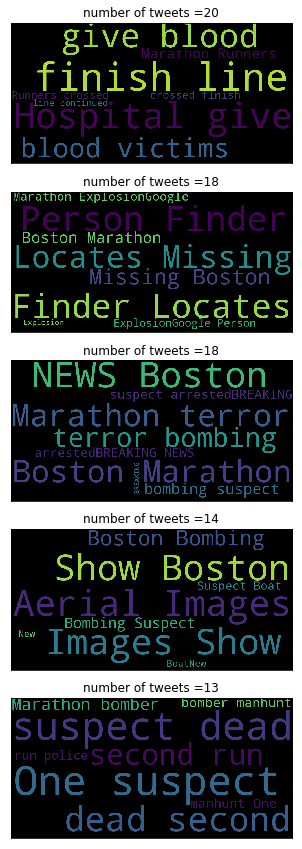

In [12]:
# lets make some wordcluds to visualize the results
f, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(5,1,figsize=(15,15))
for x in range(5):
    text = "".join(df['Clean Tweets'][[x-1 for x in groupings_list[x][1]]].values.tolist())
    wc = WordCloud(width=1000,height=500,max_words=8).generate(text)
    [ax1,ax2,ax3,ax4,ax5][x].imshow(wc)
    [ax1,ax2,ax3,ax4,ax5][x].set_title("number of tweets ="+str(groupings_list[x][2]))
    [ax1,ax2,ax3,ax4,ax5][x].set_xticks([])
    [ax1,ax2,ax3,ax4,ax5][x].set_yticks([])